In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 
df = pd.read_csv('data.csv')

#
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [9]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True)
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество')
grouped_df

,Дата,Количество
0,2018-01-02,1521
1,2018-01-03,1387
2,2018-01-04,1455
3,2018-01-05,1481
4,2018-01-06,1467
...,...,...
75,2018-12-04,1488
76,2018-12-05,1447
77,2018-12-06,1656
78,2018-12-07,1355


Вывести несколько первых строк сгруппированных данных

In [14]:
grouped_df.head()

,Дата,Количество
0,2018-01-02,1521
1,2018-01-03,1387
2,2018-01-04,1455
3,2018-01-05,1481
4,2018-01-06,1467


Нарисуйте график продаж у `grouped_df`

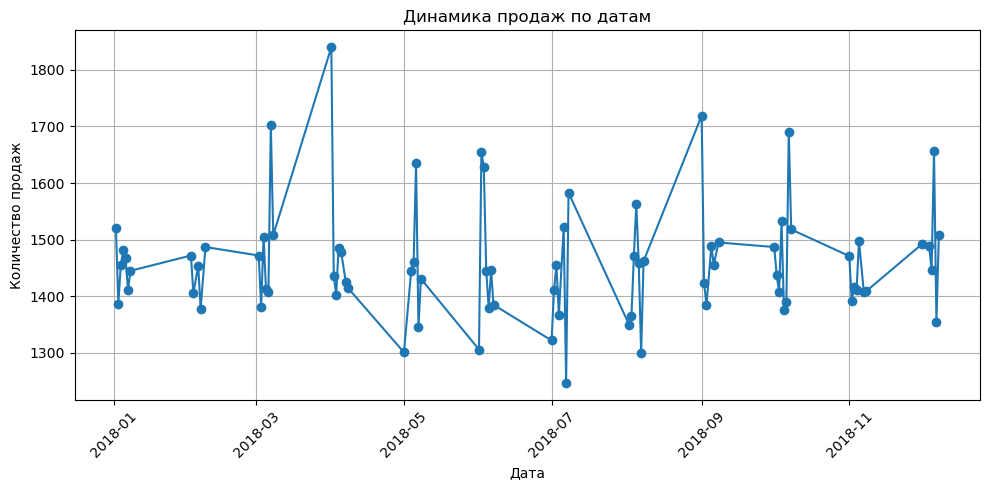

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж по датам')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [17]:
##видно относительно резкий притоктоваров Наименьшее кол-во товаров видно в июле
##Также График показывает, что продажи в течение года подвержены значительным колебаниям, с периодическими всплесками и спадами. 

SyntaxError: invalid syntax (3376936600.py, line 1)

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [21]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата                    NaT
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [22]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True)
top_item = (
    df[
        (df['Склад'] == 3) &
        (df['Дата'].dt.month.isin([6, 7, 8])) &
        (df['Дата'].dt.weekday == 2)
    ]
    .groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values('Количество', ascending=False)
    .iloc[0]
)
print(top_item)

Номенклатура    product_1
Количество            479
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [100]:
df1 = pd.read_csv('weather.csv', skiprows=6, delimiter=';', encoding='utf-8')
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-04-01,1,address_0,product_0,4
1,2018-04-01,1,address_0,product_1,4
2,2018-04-01,1,address_0,product_2,5
3,2018-04-01,1,address_0,product_3,10
4,2018-04-01,1,address_0,product_4,2


In [101]:
df1 = df1.reset_index()
df1.head()

,index,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,05.08.2025 17:00,23.3,732.1,761.9,-0.6,34,"Ветер, дующий с юго-запада",2,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",4.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05.08.2025 14:00,22.5,732.7,762.6,-1.1,37,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05.08.2025 11:00,19.4,733.8,764.1,-0.6,42,"Ветер, дующий с запада",3,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",4.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05.08.2025 08:00,14.6,734.4,765.2,0.1,61,"Ветер, дующий с запада",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",4.0,7.2,NaN,NaN,"Cухая (без трещин, заметного количества пыли и...",6.0,NaN,NaN,NaN
4,05.08.2025 05:00,7.9,734.3,765.9,-0.4,89,"Ветер, дующий с юга",1,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",4.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df1 = df1[['index', 'Местное время в Астане']]
df1 = df1.rename(columns={'index': 'Местное время в Астане', 'Местное время в Астане': 'Температура'})
df1.head()

,Местное время в Астане,Температура
0,05.08.2025 17:00,23.3
1,05.08.2025 14:00,22.5
2,05.08.2025 11:00,19.4
3,05.08.2025 08:00,14.6
4,05.08.2025 05:00,7.9


In [103]:
df1['Местное время в Астане'] = pd.to_datetime(df1['Местное время в Астане'], dayfirst=True, errors='coerce')
df1.head()

,Местное время в Астане,Температура
0,2025-08-05 17:00:00,23.3
1,2025-08-05 14:00:00,22.5
2,2025-08-05 11:00:00,19.4
3,2025-08-05 08:00:00,14.6
4,2025-08-05 05:00:00,7.9


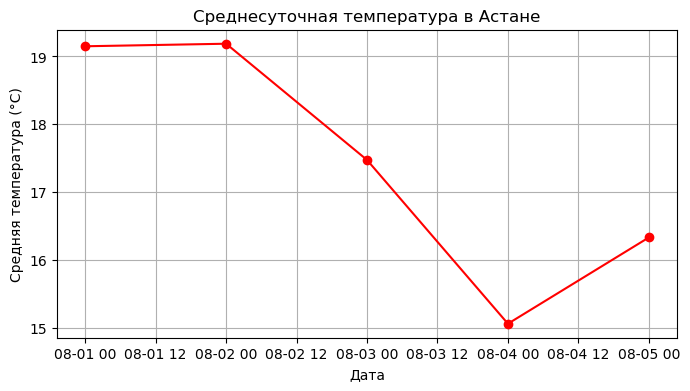

In [115]:
df1['Дата'] = df1['Местное время в Астане'].dt.date
weather_daily = df1.groupby('Дата')['Температура'].mean().reset_index()
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'])

merged = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')

# Отдельно график температуры
plt.figure(figsize=(8, 4))
plt.plot(weather_daily['Дата'], weather_daily['Температура'], marker='o', color='r')
plt.xlabel('Дата')
plt.ylabel('Средняя температура (°C)')
plt.title('Среднесуточная температура в Астане')
plt.grid(True)
plt.show()